<a href="https://colab.research.google.com/github/mwmcontador/QuarentenadeDados/blob/master/Quarentena_dados_class_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
 

#Filmes é um dataframe

In [310]:
filmes =pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.head ()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


filmes.columns




In [311]:
filmes.columns = (["filmeId", "titulo", "genero"])
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Baixando as Notas

In [312]:
ratings = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [313]:
ratings.shape

(100836, 4)

In [314]:
ratings.columns = ["usuarioId","filmeId","nota", "momento"]
ratings.columns


Index(['usuarioId', 'filmeId', 'nota', 'momento'], dtype='object')

In [315]:
ratings.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [316]:
notas_medias_por_filme = ratings.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()



filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Não rolou fazer o join com colunas diferentes

In [0]:


#pd.merge(filmes,notas_medias_por_filme, how="left", left_on= "moviedId", right_on="filmeId" )

#filmes.join(notas_medias_por_filme.set_index(["filmeId"],verify_integrity = True),on =["movieId"],how="left")

Então fiz como foi explicado na aula

In [318]:
filmes_com_medias =filmes.join(notas_medias_por_filme,on="filmeId")
filmes_com_medias.rename({"nota":"media"}, axis=1)
filmes_com_medias.columns

Index(['filmeId', 'titulo', 'genero', 'nota'], dtype='object')

In [319]:
filmes_com_medias.rename({"nota":"media"}, axis=1)
filmes_com_medias.columns

Index(['filmeId', 'titulo', 'genero', 'nota'], dtype='object')

Ordenando o dataframe por média

In [320]:

filmes_com_medias.sort_values("nota", ascending = False).head(15)

,filmeId,titulo,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


Análise Gráfica

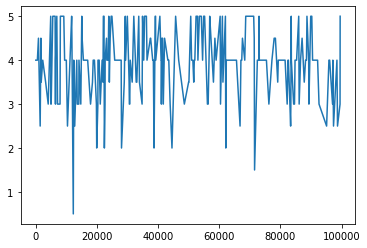

In [321]:
ratings.query("filmeId==1")['nota'].plot()

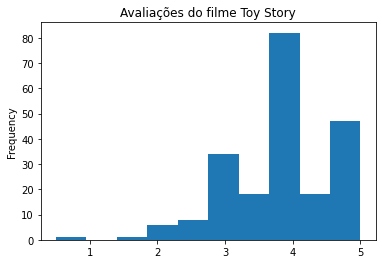

In [322]:
ratings.query("filmeId==1")['nota'].plot(kind='hist', title='Avaliações do filme Toy Story' )

Contando as avaliações

```
# This is formatted as code
```



# Desafios

# Desafio 01 do Paulo Silveira

Desafio 1 do Paulo Silveira
O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

In [0]:
#Conta as avaliações por filme 
avaliacoes_por_quantidade = ratings.groupby("filmeId")['usuarioId'].count()

#Incluir a quantidade de filmes, os quais já possuem suas médias
filmes_por_avaliacoes = filmes_com_medias.join(avaliacoes_por_quantidade, on = "filmeId")



In [324]:
#Organizar os nomes das colunas
filmes_por_avaliacoes.columns = ['filmeId', 'titulo', 'genero', 'media', 'quantidade']
filmes_por_avaliacoes.head()

,filmeId,titulo,genero,media,quantidade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [325]:
#Agora devemos achar quem não recebeu avaliação
sem_avaliacoes = filmes_por_avaliacoes[filmes_por_avaliacoes["quantidade"].isna()]
quantidade_sem_avaliacao = sem_avaliacoes.count()

print(quantidade_sem_avaliacao["filmeId"] )

18


In [326]:
sem_avaliacoes.sort_values('titulo').head(quantidade_sem_avaliacao["filmeId"] )

,filmeId,titulo,genero,media,quantidade
5957,34482,"Browning Version, The (1951)",Drama,NaN,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN
7565,85565,Chalet Girl (2011),Comedy|Romance,NaN,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN,NaN
2499,3338,For All Mankind (1989),Documentary,NaN,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN,NaN
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN,NaN
5452,26085,Mutiny on the Bounty (1962),Adventure|Drama|Romance,NaN,NaN


# Desafio 02 Guilherme Silveira

Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

Fiz no desafio anterior

  https://colab.research.google.com/drive/1OvGZFcA72Og5AdZJTyRHnoHEVLqVCtn-#scrollTo=dJLk-EKnuE6n&line=2&uniqifier=1

# Desafio 03 Guilherme Silveira
  Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

  Foi necessário fazer no desafio 01 
  https://colab.research.google.com/drive/1OvGZFcA72Og5AdZJTyRHnoHEVLqVCtn-#scrollTo=W3HCM1kebuAk&line=4&uniqifier=1

In [327]:
filmes_por_avaliacoes.head()

,filmeId,titulo,genero,media,quantidade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


# Desafio 04 Thiago Gonçalves
Arredondar as médias (coluna de nota média) para duas casas decimais.

In [328]:
filmes_por_avaliacoes['media'] =filmes_por_avaliacoes['media'].round(2)
filmes_por_avaliacoes['quantidade'] =filmes_por_avaliacoes['quantidade'].round(0)
filmes_por_avaliacoes.head()

,filmeId,titulo,genero,media,quantidade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


# Desafio 05 do Allan Spadini
Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)New Section

In [329]:
generos= filmes

generos["qtd_generos"] = generos["genero"].str.count('\|')+1
generos =generos["qtd_generos"] 
generos.head()

0    5
1    3
2    2
3    3
4    1
Name: qtd_generos, dtype: int64

Existe 2851 filmes com somente um gênero.

In [330]:
filmes.query('qtd_generos == 1')



,filmeId,titulo,genero,qtd_generos
4,5,Father of the Bride Part II (1995),Comedy,1
8,9,Sudden Death (1995),Action,1
13,14,Nixon (1995),Drama,1
17,18,Four Rooms (1995),Comedy,1
18,19,Ace Ventura: When Nature Calls (1995),Comedy,1
...,...,...,...,...
9730,190221,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Documentary,1
9735,193573,Love Live! The School Idol Movie (2015),Animation,1
9736,193579,Jon Stewart Has Left the Building (2015),Documentary,1
9739,193585,Flint (2017),Drama,1


In [337]:
filmes['genero']
split_data = filmes['genero'].str.split("|")
lista_generos = []
for lista in split_data:
  for nome_genero in lista:
    lista_generos.append(nome_genero)
  
generos_series = pd.Series(lista_generos)
generos_series
generos_series.unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

Solução do Allan Spandini

In [371]:
generos_df = filmes_por_avaliacoes.genero.str.get_dummies('|')
generos = generos_df.columns.to_list()
generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

# Desafio 06 da Thais André
Contar o número de aparições de cada genero.André

In [368]:
lista_genero = generos_series.unique()
lista_genero

dict_generos = {}

#Inicializa a contagem de cada gênero com 0
for cont in lista_genero:
  dict_generos[cont] = 0

dict_generos

dict_generos

#Atualiza contagem
split_data = filmes['genero'].str.split("|")
generos = []
for lista in split_data:
  for genero in lista:
    dict_generos[genero] += 1
dict_generos

generos_df = pd.DataFrame(dict_generos.items(), columns= ['genero', 'qtd'])
generos_df.sort_values('qtd', ascending=False)


,genero,qtd
6,Drama,4361
3,Comedy,3756
9,Thriller,1894
7,Action,1828
5,Romance,1596
0,Adventure,1263
8,Crime,1199
12,Sci-Fi,980
10,Horror,978
4,Fantasy,779


Solução da Thais

In [372]:
total_filmes_por_genero = filmes_por_avaliacoes.genero.str.get_dummies().sum()
total_filmes_por_genero

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

# Desafio 07 do Guilherme Silveira
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.New Section

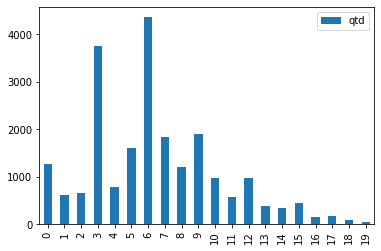

In [369]:
generos_df.plot(kind='bar')

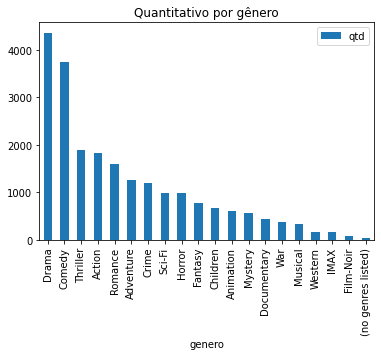

In [370]:
generos_df.sort_values('qtd', ascending=False).plot(kind='bar', x='genero', y='qtd', title='Quantitativo por gênero')